# Characterizing the nucleotide error rate
---

In [5]:
import os
import sys
import configparser
import getopt
import numpy as np
import pandas as pd
from collections import Counter

from lib.error import *

In [93]:
from matplotlib import lines
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = [4, 4]

## Preference

In [7]:
expt_dir = "../analysis/ont/zambia/2019-04-10"
cntrl_sample = "BC05"

# I. By-gene

## a. $KELCH13$

In [139]:
cntrl_fn = cntrl_sample + ".KELCH13.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [140]:
kelch = pd.read_csv(cntrl_path)
kelch = convert_to_frequencies(kelch, "total", ["position", "ref", "total"])

Text(0.5,0.98,'$Kelch13$')

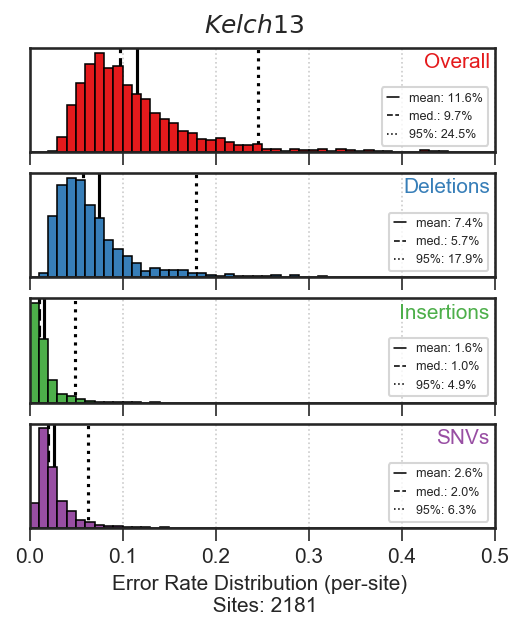

In [141]:
fig, axes = plt.subplots(4, 1, figsize=(4, 4), sharex=True)
fig.subplots_adjust(top=0.925)

params = {
    "error": "Overall",
    "-": "Deletions",
    "+": "Insertions",
    "SNV": "SNVs"}
bs = np.arange(0, 0.525, 0.01)

cols = sns.color_palette("Set1", 4)
for (p, name), (col, ax) in zip(params.items(), zip(cols, axes.flatten())):
    
    values = kelch[p]
    stats = {
        "mean": (values.mean(), "solid"),
        "med.": (values.median(), "dashed"),
        "95%": (values.quantile(q=0.95), "dotted")
    }
    
    # Plot
    ax.hist(values, bins=bs, color=col, 
            edgecolor='black', linewidth=0.75)
    
    ax.grid(linestyle='dotted')
    
    # Axis
    ax.yaxis.set_visible(False)
    
    # Lines
    for stat, (val, ls) in stats.items():
        ax.axvline(val, color="black", linestyle=ls, label=stat, zorder=0)
    
    # Legend
    handles = [lines.Line2D([0], [0],
                            linestyle=ls, color='black',
                            linewidth=0.75,
                            label="%s: %.01f%%" % (stat, 100*val)) 
               for stat, (val, ls) in stats.items()]
    ax.legend(loc="lower right", handles=handles, handlelength=1.0,
              fontsize=6, frameon=True)
    
    
    # Title
    ax.annotate(xy=(0.99, 0.95), xycoords="axes fraction",
                ha="right", va="top",
                color=col,
                s=name)
    ax.set_xlim((0, 0.5))
    
    
    
ax.set_xlabel("Error Rate Distribution (per-site) \n Sites: %d" % len(kelch))
fig.suptitle("$Kelch13$")

## b. $DHFR$

In [142]:
cntrl_fn = cntrl_sample + ".DHFR.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [143]:
dhfr = pd.read_csv(cntrl_path)
dhfr = convert_to_frequencies(dhfr, "total", ["position", "ref", "total"])

Text(0.5,0.98,'$DHFR$')

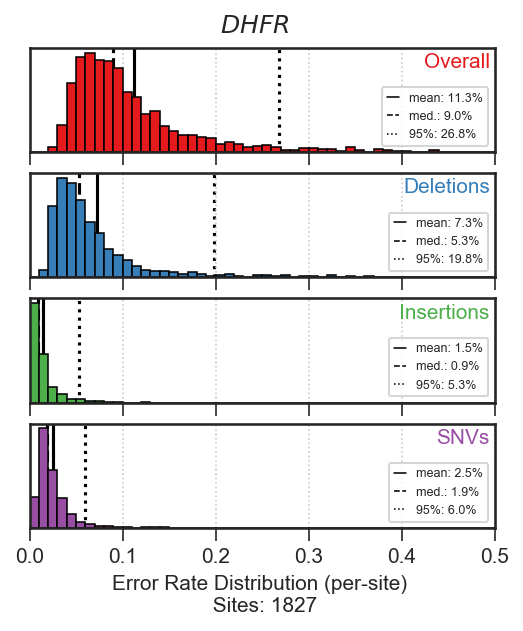

In [144]:
fig, axes = plt.subplots(4, 1, figsize=(4, 4), sharex=True)
fig.subplots_adjust(top=0.925)

params = {
    "error": "Overall",
    "-": "Deletions",
    "+": "Insertions",
    "SNV": "SNVs"}
bs = np.arange(0, 0.525, 0.01)

cols = sns.color_palette("Set1", 4)
for (p, name), (col, ax) in zip(params.items(), zip(cols, axes.flatten())):
    
    values = dhfr[p]
    stats = {
        "mean": (values.mean(), "solid"),
        "med.": (values.median(), "dashed"),
        "95%": (values.quantile(q=0.95), "dotted")
    }
    
    # Plot
    ax.hist(values, bins=bs, color=col, 
            edgecolor='black', linewidth=0.75)
    
    ax.grid(linestyle='dotted')
    
    # Axis
    ax.yaxis.set_visible(False)
    
    # Lines
    for stat, (val, ls) in stats.items():
        ax.axvline(val, color="black", linestyle=ls, label=stat, zorder=0)
    
    # Legend
    handles = [lines.Line2D([0], [0],
                            linestyle=ls, color='black',
                            linewidth=0.75,
                            label="%s: %.01f%%" % (stat, 100*val)) 
               for stat, (val, ls) in stats.items()]
    ax.legend(loc="lower right", handles=handles, handlelength=1.0,
              fontsize=6, frameon=True)
    
    
    # Title
    ax.annotate(xy=(0.99, 0.95), xycoords="axes fraction",
                ha="right", va="top",
                color=col,
                s=name)
    ax.set_xlim((0, 0.5))
    
    
    
ax.set_xlabel("Error Rate Distribution (per-site) \n Sites: %d" % len(dhfr))
fig.suptitle("$DHFR$")

## c. $CRT1$

In [145]:
cntrl_fn = cntrl_sample + ".CRT.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [146]:
crt = pd.read_csv(cntrl_path)
crt.query("total > 1", inplace=True)
crt = convert_to_frequencies(crt, "total", ["position", "ref", "total"])

Text(0.5,0.98,'$CRT1$')

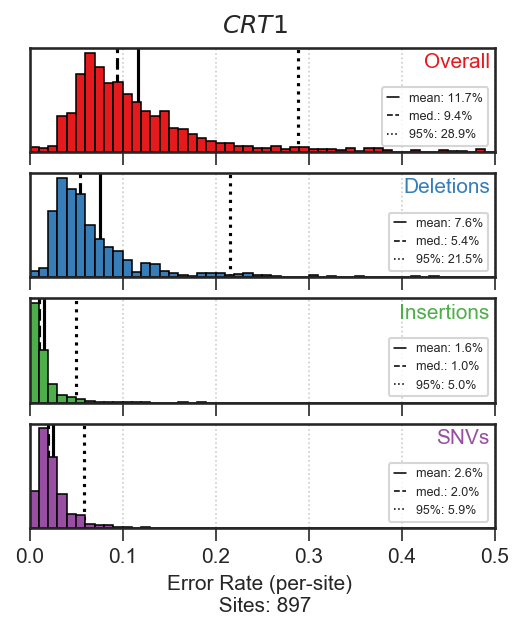

In [147]:
fig, axes = plt.subplots(4, 1, figsize=(4, 4), sharex=True)
fig.subplots_adjust(top=0.925)

params = {
    "error": "Overall",
    "-": "Deletions",
    "+": "Insertions",
    "SNV": "SNVs"}
bs = np.arange(0, 0.525, 0.01)

cols = sns.color_palette("Set1", 4)
for (p, name), (col, ax) in zip(params.items(), zip(cols, axes.flatten())):
    
    values = crt[p]
    stats = {
        "mean": (values.mean(), "solid"),
        "med.": (values.median(), "dashed"),
        "95%": (values.quantile(q=0.95), "dotted")
    }
    
    # Plot
    ax.hist(values, bins=bs, color=col, 
            edgecolor='black', linewidth=0.75)
    
    ax.grid(linestyle='dotted')
    
    # Axis
    ax.yaxis.set_visible(False)
    
    # Lines
    for stat, (val, ls) in stats.items():
        ax.axvline(val, color="black", linestyle=ls, label=stat, zorder=0)
    
    # Legend
    handles = [lines.Line2D([0], [0],
                            linestyle=ls, color='black',
                            linewidth=0.75,
                            label="%s: %.01f%%" % (stat, 100*val)) 
               for stat, (val, ls) in stats.items()]
    ax.legend(loc="lower right", handles=handles, handlelength=1.0,
              fontsize=6, frameon=True)
    
    
    # Title
    ax.annotate(xy=(0.99, 0.95), xycoords="axes fraction",
                ha="right", va="top",
                color=col,
                s=name)
    ax.set_xlim((0, 0.5))
    
    
    
ax.set_xlabel("Error Rate (per-site) \n Sites: %d" % len(crt))
fig.suptitle("$CRT1$")

## d. $MSP2$

In [148]:
cntrl_fn = cntrl_sample + ".MSP2.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [149]:
msp = pd.read_csv(cntrl_path)
msp.query("total > 1", inplace=True)
msp = convert_to_frequencies(msp, "total", ["position", "ref", "total"])

Text(0.5,0.98,'$MSP2$')

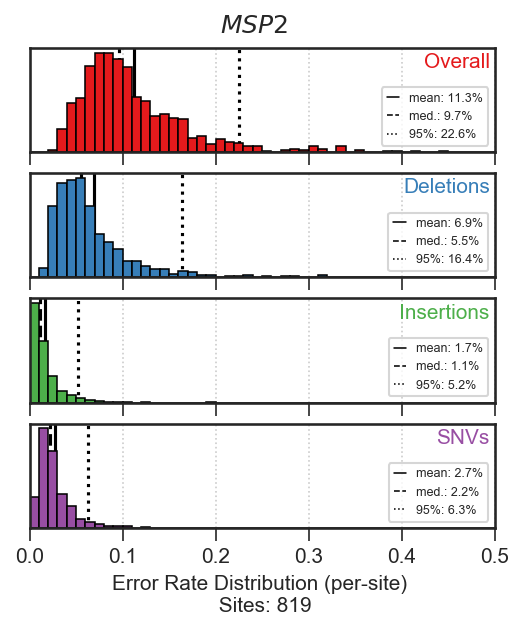

In [150]:
fig, axes = plt.subplots(4, 1, figsize=(4, 4), sharex=True)
fig.subplots_adjust(top=0.925)

params = {
    "error": "Overall",
    "-": "Deletions",
    "+": "Insertions",
    "SNV": "SNVs"}
bs = np.arange(0, 0.525, 0.01)

cols = sns.color_palette("Set1", 4)
for (p, name), (col, ax) in zip(params.items(), zip(cols, axes.flatten())):
    
    values = msp[p]
    stats = {
        "mean": (values.mean(), "solid"),
        "med.": (values.median(), "dashed"),
        "95%": (values.quantile(q=0.95), "dotted")
    }
    
    # Plot
    ax.hist(values, bins=bs, color=col, 
            edgecolor='black', linewidth=0.75)
    
    ax.grid(linestyle='dotted')
    
    # Axis
    ax.yaxis.set_visible(False)
    
    # Lines
    for stat, (val, ls) in stats.items():
        ax.axvline(val, color="black", linestyle=ls, label=stat, zorder=0)
    
    # Legend
    handles = [lines.Line2D([0], [0],
                            linestyle=ls, color='black',
                            linewidth=0.75,
                            label="%s: %.01f%%" % (stat, 100*val)) 
               for stat, (val, ls) in stats.items()]
    ax.legend(loc="lower right", handles=handles, handlelength=1.0,
              fontsize=6, frameon=True)
    
    
    # Title
    ax.annotate(xy=(0.99, 0.95), xycoords="axes fraction",
                ha="right", va="top",
                color=col,
                s=name)
    ax.set_xlim((0, 0.5))
    
    
    
ax.set_xlabel("Error Rate Distribution (per-site) \n Sites: %d" % len(msp))
fig.suptitle("$MSP2$")

# II. Combined

In [152]:
genes = [kelch, dhfr, crt, msp]
gene_df = pd.concat(genes)

Text(0.5,0,'Error Rate (per-site) \n Sites: 5724')

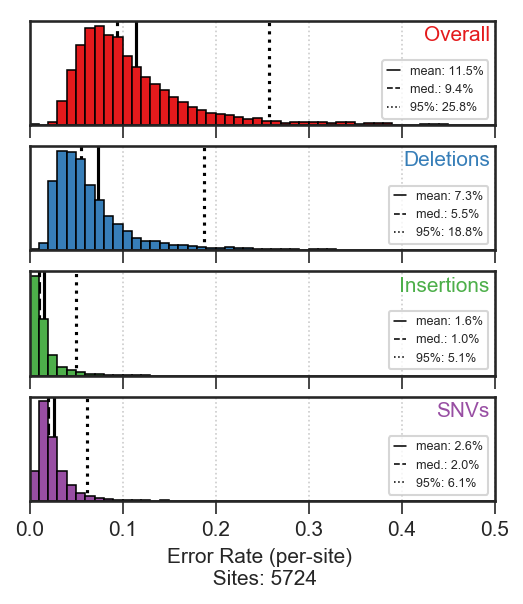

In [163]:
fig, axes = plt.subplots(4, 1, figsize=(4, 4), sharex=True)
fig.subplots_adjust(top=0.925)

params = {
    "error": "Overall",
    "-": "Deletions",
    "+": "Insertions",
    "SNV": "SNVs"}
bs = np.arange(0, 0.525, 0.01)

cols = sns.color_palette("Set1", 4)
for (p, name), (col, ax) in zip(params.items(), zip(cols, axes.flatten())):
    
    values = gene_df[p]
    stats = {
        "mean": (values.mean(), "solid"),
        "med.": (values.median(), "dashed"),
        "95%": (values.quantile(q=0.95), "dotted")
    }
    
    # Plot
    ax.hist(values, bins=bs, color=col, 
            edgecolor='black', linewidth=0.75)
    
    ax.grid(linestyle='dotted')
    
    # Axis
    ax.yaxis.set_visible(False)
    
    # Lines
    for stat, (val, ls) in stats.items():
        ax.axvline(val, color="black", linestyle=ls, label=stat, zorder=0)
    
    # Legend
    handles = [lines.Line2D([0], [0],
                            linestyle=ls, color='black',
                            linewidth=0.75,
                            label="%s: %.01f%%" % (stat, 100*val)) 
               for stat, (val, ls) in stats.items()]
    ax.legend(loc="lower right", handles=handles, handlelength=1.0,
              fontsize=6, frameon=True)
    
    
    # Title
    ax.annotate(xy=(0.99, 0.95), xycoords="axes fraction",
                ha="right", va="top",
                color=col,
                s=name)
    ax.set_xlim((0, 0.5))
    
    
    
ax.set_xlabel("Error Rate (per-site) \n Sites: %d" % len(gene_df))
#fig.suptitle("3d7", fontsize=12)